In [5]:
#import 
import pandas as pd
import sqlite3
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
#connect db with python and turn it into a df.
dat = sqlite3.connect('titanic_test.db')
query = dat.execute("SELECT * From passenger_data")
cols = [column[0] for column in query.description]
df_1 = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [3]:
#connect db with python and turn it into a df.
dat = sqlite3.connect('titanic_test.db')
query = dat.execute("SELECT * From Survived_table")
cols = [column[0] for column in query.description]
df_2 = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [7]:
train = df_1.merge(df_2, how='inner', on='PassengerId')

In [8]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,,1,2,W./C. 6607,23.45,,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C,1


In [42]:
#Exploratory Analysis
#Due to missing values got translaste to object, so we are reading original csv
data_train = pd.read_csv('train.csv')

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.5)  

[None]

<Figure size 432x288 with 0 Axes>

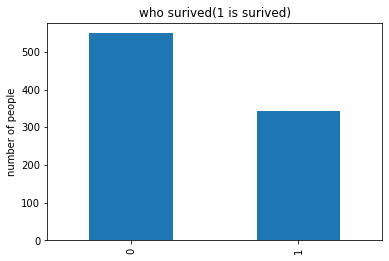

In [51]:
plt.subplot2grid  
data_train.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"who surived(1 is surived)") # puts a title on our graph
plt.ylabel(u"# of Passengers")  
plt.savefig("analysis\who_surived_vs_those_who_did_not.png")

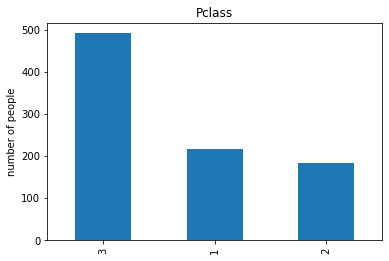

In [52]:
plt.subplot2grid
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"# of Passengers")
plt.title(u"Pclass")
plt.savefig("analysis\Pclass.png")

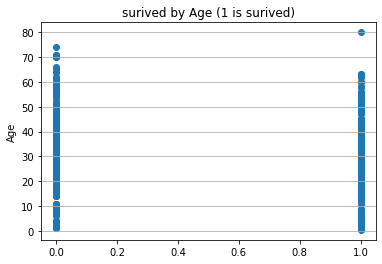

In [53]:
plt.subplot2grid
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"Age")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"surived by Age (1 is surived)")
plt.savefig("analysis\surived by Age.png")

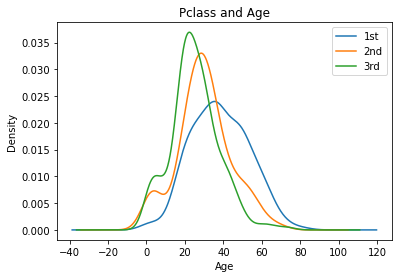

In [54]:
plt.subplot2grid
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Age")# plots an axis lable
plt.ylabel(u"Density") 
plt.title(u"Pclass and Age")
plt.legend((u'1st', u'2nd',u'3rd'),loc='best') # sets our legend for our graph.
plt.savefig("analysis\Pclass and Age.png")

<Figure size 432x288 with 0 Axes>

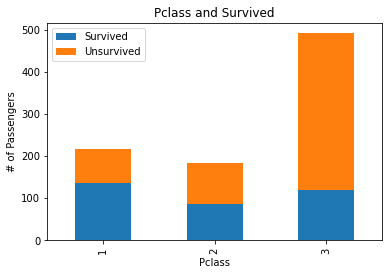

<Figure size 432x288 with 0 Axes>

In [61]:
fig = plt.figure()
fig.set(alpha=0.2) 

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({'Survived':Survived_1, 'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Pclass and Survived")
plt.xlabel(u"Pclass") 
plt.ylabel(u"# of Passengers") 

plt.show()
plt.savefig("analysis\Pclass and Survived.png")

<Figure size 432x288 with 0 Axes>

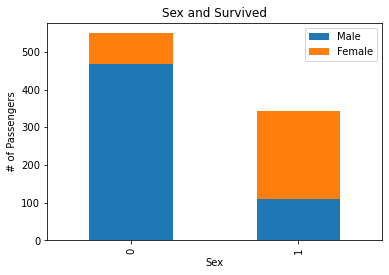

<Figure size 432x288 with 0 Axes>

In [62]:
fig = plt.figure()
fig.set(alpha=0.2)  

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({'Male':Survived_m, 'Female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"Sex and Survived")
plt.xlabel(u"Sex") 
plt.ylabel(u"# of Passengers")
plt.show()
plt.savefig("analysis\Sex and Survived.png")

In [ ]:
# Missing Value

In [96]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in train:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    

print(data1.isnull().sum())

print(data_val.isnull().sum())

TypeError: string indices must be integers